In [1]:
import os
import numpy as np
import xarray as xr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

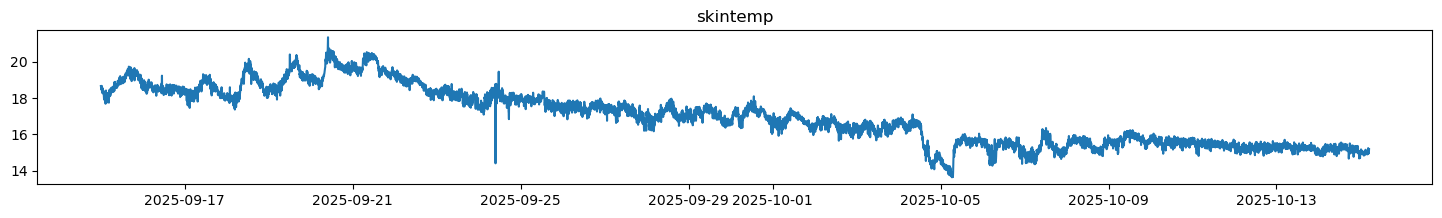

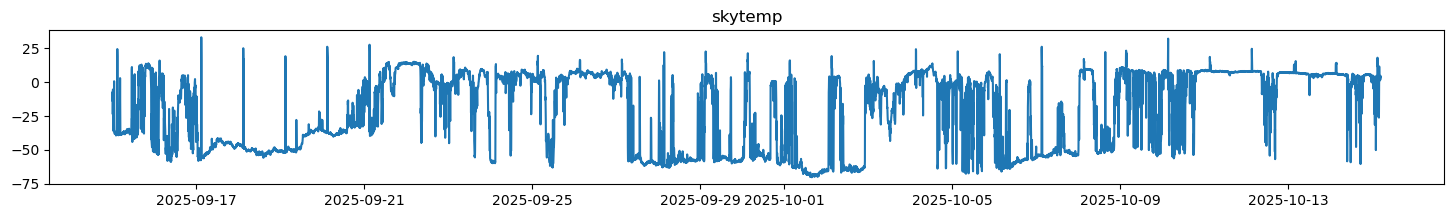

In [8]:
folder = "../data/Level1"
qa = True
files = [os.path.join(folder, f) for f in os.listdir(folder)]
files.sort()
files = files[-5:]
with xr.open_mfdataset(files, decode_times=False) as ds:
    t = np.array(ds.variables["time"][:].values, dtype="datetime64[s]")
    for var in ds.variables:
        if "_qual" not in var and var != "time":
            v = np.array(ds.variables[var][:].values)
            if var + "_qual" in ds.variables and qa:
                q = np.array(ds.variables[var + "_qual"][:].values)
                v[q > 0] = np.nan
            plt.figure(figsize=(18, 2))
            plt.title(var)
            plt.plot(t, v, label=var)
            plt.show()